In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [110]:
SLAKE_DATA = "CLOSED_data_en.csv"
VQARAD_DATA = "vqarad_CLOSED.csv"

SLAKE_df = pd.read_csv(SLAKE_DATA)
VQARAD_df = pd.read_csv(VQARAD_DATA)

In [111]:
SLAKE_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2781 entries, 0 to 2780
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   img_id        2781 non-null   int64 
 1   img_name      2781 non-null   object
 2   question      2781 non-null   object
 3   answer        2781 non-null   object
 4   q_lang        2781 non-null   object
 5   location      2781 non-null   object
 6   modality      2781 non-null   object
 7   answer_type   2781 non-null   object
 8   base_type     2781 non-null   object
 9   content_type  2781 non-null   object
 10  triple        2781 non-null   object
 11  qid           2781 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 260.8+ KB


In [112]:
VQARAD_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   qid                956 non-null    int64 
 1   phrase_type        956 non-null    object
 2   qid_linked_id      956 non-null    object
 3   image_case_url     956 non-null    object
 4   image_name         956 non-null    object
 5   image_organ        956 non-null    object
 6   evaluation         956 non-null    object
 7   question           956 non-null    object
 8   question_rephrase  831 non-null    object
 9   question_relation  826 non-null    object
 10  question_frame     661 non-null    object
 11  question_type      956 non-null    object
 12  answer             956 non-null    object
 13  answer_type        956 non-null    object
dtypes: int64(1), object(13)
memory usage: 104.7+ KB


In [113]:
def df_unique_values(df, MAX_VALUES=10, col=None):

    print("\n================== UNIQUE VALUES REPORT ==================\n")

    if col is not None:
        if col not in df.columns:
            print(f"Column '{col}' does not exist in the DataFrame.")
            return
        
        unique_vals = df[col].unique()
        num_unique = len(unique_vals)

        print(f"Column Name: {col}")

        if num_unique > MAX_VALUES:
            print(f"  Unique Values ({num_unique} total): showing first {MAX_VALUES}")
            print(f"  {list(unique_vals[:MAX_VALUES])}")
        else:
            print(f"  Unique Values ({num_unique} total):")
            print(f"  {unique_vals}")

        print("\n  Value Counts:")
        print(df[col].value_counts().head(MAX_VALUES))

        print("\n====================== END REPORT ======================\n")
        return
    
    for col in df.columns:
        print(f"Column Name: {col}")
        unique_vals = df[col].unique()
        num_unique = len(unique_vals)

        if num_unique > MAX_VALUES:
            print(f"  Unique Values ({num_unique} total): showing first {MAX_VALUES}")
            print(f"  {list(unique_vals[:MAX_VALUES])}")
        else:
            print(f"  Unique Values ({num_unique} total):")
            print(f"  {unique_vals}")

        print("\n  Value Counts:")
        print(df[col].value_counts().head(MAX_VALUES))
        print("\n--------------------------------------------------------------\n")

    print("========================== END REPORT =========================\n")




In [114]:
def plot_distribution(df, col = None, x_label = "x_label", y_label = "y_label", title = "title", display_counts = True):
    counts = df[col].value_counts()

    plt.figure()
    ax = counts.plot(kind="bar")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    if display_counts:
        # Add counts on bars
        for i, v in enumerate(counts.values):
            ax.text(i, v + (0.01 * v), str(v), ha='center', va='bottom')

    plt.show()

In [115]:
def drop_rows(df, col, target_rows, save_to_csv=True, csv_file="Updated_full_data.csv", csv_folder="CSV Files"):
    if not isinstance(target_rows, (list, tuple, set)):
        target_rows = [target_rows]

    df_filtered = df[~df[col].isin(target_rows)]

    if save_to_csv:
        if not os.path.exists(csv_folder):
            os.makedirs(csv_folder)

        csv_path = os.path.join(csv_folder, csv_file)

        if not os.path.exists(csv_path):
            df_filtered.to_csv(csv_path, index=False)
            print(f"New csv file created: {csv_file}")
        else:
            print(f"CSV file already exists at: {csv_path}")

    return df_filtered


def drop_cols(df, cols_to_drop, save_to_csv = True, csv_file = "Updated_full_data.csv", csv_folder = "CSV FILES"):
    df_filtered = df.drop(columns = cols_to_drop)

    if save_to_csv:
        if not os.path.exists(csv_folder):
            os.makedirs(csv_folder)

        csv_path = os.path.join(csv_folder, csv_file)

        if not os.path.exists(csv_path):
            df_filtered.to_csv(csv_path, index=False)
            print(f"New csv file name {csv_file}")
        else:
            print(f"csv file already exists at {csv_path}")

    return df_filtered


In [116]:
cols_to_drop_SLAKE = ["q_lang", "modality", "base_type", "triple"]
SLAKE_df = drop_rows(SLAKE_df, "content_type", "KG", save_to_csv= False)
SLAKE_df = drop_cols(SLAKE_df, cols_to_drop_SLAKE, csv_file="SLAKE_CLOSED_Filtered.csv")

csv file already exists at CSV FILES\SLAKE_CLOSED_Filtered.csv


In [117]:
cols_to_drop_VQA = ["phrase_type", "qid_linked_id", "image_case_url", "evaluation", "question_rephrase", "question_relation", "question_frame"]
VQARAD_df = drop_cols(VQARAD_df, cols_to_drop_VQA, csv_file="VQARAD_CLOSED_Filtered.csv")

csv file already exists at CSV FILES\VQARAD_CLOSED_Filtered.csv


## Naming Convention
These columns are shared across both datasets.

| # | Standardized Col Name | SLAKE Col Name | VQARAD Col Name |
|---|------------------------|----------------|------------------|
| 1 | image_name             | img_name       | image_name       |
| 2 | question               | question       | question         |
| 3 | answer                 | answer         | answer           |
| 4 | location               | location       | image_organ      |
| 5 | answer_type            | answer_type    | answer_type      |
| 6 | content_type           | content_type   | question_type    |
| 7 | question_id            | qid            | qid              |



In [118]:
def rename_to_standard(df, standardized_cols, source_cols):
    rename_map = {
        src: std for std, src in zip(standardized_cols, source_cols)
        if src in df.columns
    }

    df = df.rename(columns=rename_map)

    for col in standardized_cols:
        if col not in df.columns:
            df[col] = np.nan


    return df[standardized_cols]


In [119]:
standardized = [
    "image_name", "question", "answer",
    "location", "answer_type", "content_type", "question_id"
]

slake_cols = [
    "img_name", "question", "answer",
    "location", "answer_type", "content_type", "qid"
]

vqarad_cols = [
    "image_name", "question", "answer",
    "image_organ", "answer_type", "question_type", "qid"
]

In [120]:
SLAKE_df = rename_to_standard(SLAKE_df, standardized, slake_cols)
VQARAD_df = rename_to_standard(VQARAD_df, standardized, vqarad_cols)

In [121]:
SLAKE_df.info()
VQARAD_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2526 entries, 0 to 2780
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   image_name    2526 non-null   object
 1   question      2526 non-null   object
 2   answer        2526 non-null   object
 3   location      2526 non-null   object
 4   answer_type   2526 non-null   object
 5   content_type  2526 non-null   object
 6   question_id   2526 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 157.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   image_name    956 non-null    object
 1   question      956 non-null    object
 2   answer        956 non-null    object
 3   location      956 non-null    object
 4   answer_type   956 non-null    object
 5   content_type  956 non-null    object
 6   question_id   956 non-nu

In [122]:
def merge_df(df):
    merged_df = pd.concat(df, ignore_index=True, sort=False)
    merged_df.to_csv("merged.csv")
    return merged_df

df_list = [SLAKE_df, VQARAD_df]
merged_df = merge_df(df_list)


In [123]:
def standardized_rows(val, mapping=None, keep_multiple=True):
    if pd.isna(val):
        return val
    
    v = str(val).strip().lower()

    parts = [p.strip() for p in v.split(",")]

    if mapping is not None:
        parts = [mapping.get(p, p) for p in parts]

    return ", ".join(parts) if keep_multiple else parts[0]


In [124]:
df_unique_values(merged_df, MAX_VALUES= 100, col= "content_type")


================== UNIQUE VALUES REPORT ==================

Column Name: content_type
  Unique Values (25 total):
  ['Organ' 'Abnormality' 'Size' 'Modality' 'Plane' 'Position' 'Color'
 'MODALITY' 'PLANE' 'ORGAN' 'COUNT' 'SIZE' 'PRES' 'ABN' 'POS' 'OTHER'
 'ATTRIB' 'PRES, ABN' 'COLOR' 'ATTRIB, PRES' 'COLOR, PRES' 'PRES, ATTRIB'
 'ABN, POS' 'POS, PRES' 'PRSE']

  Value Counts:
content_type
Organ           1126
Abnormality      723
PRES             423
Modality         201
Size             176
Plane            158
Position         122
SIZE             115
MODALITY          92
ABN               79
PLANE             59
ATTRIB            39
POS               38
OTHER             34
COLOR             32
Color             20
ORGAN             17
COUNT             10
PRES, ATTRIB       6
ATTRIB, PRES       4
COLOR, PRES        2
POS, PRES          2
ABN, POS           2
PRES, ABN          1
PRSE               1
Name: count, dtype: int64

====================== END REPORT ======================


In [125]:
content_type_mapping = {
    "organ": "organ",
    "abnormality": "abnormality",
    "abn": "abnormality",
    "size": "size",
    "count": "size",
    "modality": "modality",
    "plane": "plane",
    "position": "position",
    "pos": "position",
    "color": "color",
    "attrib": "attribute",
    "prse": "presence",
    "pres": "presence",
    "other": "other"
}

merged_df["content_type"] = merged_df["content_type"].apply(
    lambda x: standardized_rows(x, mapping=content_type_mapping)
)


In [126]:
df_unique_values(merged_df, MAX_VALUES= 100, col= "location")


================== UNIQUE VALUES REPORT ==================

Column Name: location
  Unique Values (13 total):
  ['Abdomen' 'Lung' 'Chest_heart' 'Chest_lung' 'Brain_Tissue' 'Brain_Face'
 'Brain' 'Neck' 'Chest_mediastinal' 'Pelvic Cavity' 'CHEST' 'HEAD' 'ABD']

  Value Counts:
location
Abdomen              866
Lung                 850
CHEST                381
Brain_Tissue         368
ABD                  329
HEAD                 246
Pelvic Cavity        114
Brain                 78
Brain_Face            66
Neck                  66
Chest_lung            65
Chest_heart           43
Chest_mediastinal     10
Name: count, dtype: int64

====================== END REPORT ======================



In [127]:
location_mapping = {
    "abdomen": "abdomen",
    "lung": "lung",
    "chest_heart": "chest_heart",
    "chest_lung": "chest_lung",
    "brain_tissue": "brain_tissue",
    "brain_face": "brain_face",
    "brain": "brain",
    "neck": "neck",
    "chest_mediastinal": "chest_mediastinal",
    "pelvic cavity": "pelvic cavity",
    "chest": "chest",
    "head": "head",
    "abd": "abd"
}

merged_df["location"] = merged_df["location"].apply(
    lambda x: standardized_rows(x, mapping=location_mapping)
)


In [128]:
df_unique_values(merged_df, MAX_VALUES= 100, col= "answer")


================== UNIQUE VALUES REPORT ==================

Column Name: answer
  Unique Values (91 total):
  ['Yes' 'No' 'Liver' 'Lung' 'Heart' 'Both' 'Spleen' 'Kidney'
 'Almost the same' 'Coronal Plane' 'Left' 'Right' 'X-Ray'
 'Transverse Plane' 'CT' 'T2' 'Gray' 'Hypodense' 'Hyperdense' 'T1' 'MRI'
 'White' 'Left Kidney' 'Colon' 'Small Bowel' 'Spinal Cord' 'Right Kidney'
 'Duodenum' 'Stomach' 'Left Lung' 'Right Lung' 'Bladder' 'Rectum' 'Top'
 'Esophagus' 'Lower Right' 'Small bowel' 'Spinal cord' 'Right lung' 'no'
 'yes' 'Asymmetric' 'Diffuse' 'Enlarged' 'one' 'Superior' 'Left side'
 'Left kidney' 'more dense' 'less dense' 'surrounding tissue' 'Less dense'
 'The surrounding tissue' 'Right side' 'Solid' 'supratentorial' 'Female'
 'White matter' 'Abscess' 'Medical process' 'PA'
 'Contrast CT with GI and IV contrast' 'Non-contrast CT' 'With contrast'
 'heterogeneous' 'with contrast' 'Bilateral frontal lobes' 'Hyperintense'
 'contrast' 'Radiolucent' 'Bilateral' 'Non-enhanced' 'AP' 'FLAIR'

In [129]:
answer_mapping = {
    "abnormal": "abnormal",
    "abscess": "abscess",
    "almost the same": "almost the same",
    "ap": "ap",
    "asymmetric": "asymmetric",
    "axial": "axial",
    "base": "base",
    "bilateral": "bilateral",
    "bilateral frontal lobes": "bilateral frontal lobes",
    "bladder": "bladder",
    "both": "both",
    "both sides": "both sides",
    "colon": "colon",
    "contrast": "contrast",
    "contrast ct with gi and iv contrast": "contrast ct with gi and iv contrast",
    "coronal plane": "coronal plane",
    "ct": "ct",
    "cystic": "cystic",
    "diffuse": "diffuse",
    "duodenum": "duodenum",
    "enlarged": "enlarged",
    "esophagus": "esophagus",
    "exterior": "exterior",
    "female": "female",
    "flair": "flair",
    "gray": "gray",
    "gray matter": "gray matter",
    "heart": "heart",
    "heterogeneous": "heterogeneous",
    "hyperdense": "hyperdense",
    "hyperinflation": "hyperinflation",
    "hyperintense": "hyperintense",
    "hypodense": "hypodense",
    "irregular": "irregular",
    "kidney": "kidney",
    "left": "left",
    "left kidney": "left kidney",
    "left lung": "left lung",
    "left side": "left side",
    "less dense": "less dense",
    "liver": "liver",
    "lower right": "lower right",
    "lung": "lung",
    "medical process": "medical process",
    "mri": "mri",
    "more dense": "more dense",
    "neck": "neck",
    "no": "no",
    "non-contrast": "non-contrast",
    "non-contrast ct": "non-contrast ct",
    "non-enhanced": "non-enhanced",
    "normal": "normal",
    "on top of the patient": "on top of the patient",
    "one": "one",
    "outside": "outside",
    "pa": "pa",
    "pleural effusion": "pleural effusion",
    "radiolucent": "radiolucent",
    "rectum": "rectum",
    "right": "right",
    "right kidney": "right kidney",
    "right lung": "right lung",
    "right side": "right side",
    "solid": "solid",
    "small bowel": "small bowel",
    "spinal cord": "spinal cord",
    "spleen": "spleen",
    "stomach": "stomach",
    "superficial to the patient's skin": "superficial to the patient's skin",
    "superior": "superior",
    "supratentorial": "supratentorial",
    "surrounding tissue": "surrounding tissue",
    "t1": "t1",
    "t2": "t2",
    "the surrounding tissue": "the surrounding tissue",
    "top": "top",
    "transverse plane": "transverse plane",
    "white": "white",
    "white matter": "white matter",
    "with contrast": "with contrast",
    "x-ray": "x-ray",
    "yes": "yes"
}

merged_df["answer"] = merged_df["answer"].apply(
    lambda x: standardized_rows(x, mapping=answer_mapping)
)


In [130]:
target_rows = [
    "presence, attribute",
    "attribute, presence",
    "abnormality, position",
    "color, presence",
    "position, presence",
    "presence, abnormality"
]

merged_df = drop_rows(
    merged_df,
    col="content_type",
    target_rows=target_rows,
    save_to_csv=True,
    csv_file="merged.csv",
    csv_folder="CSV Files"
)


CSV file already exists at: CSV Files\merged.csv


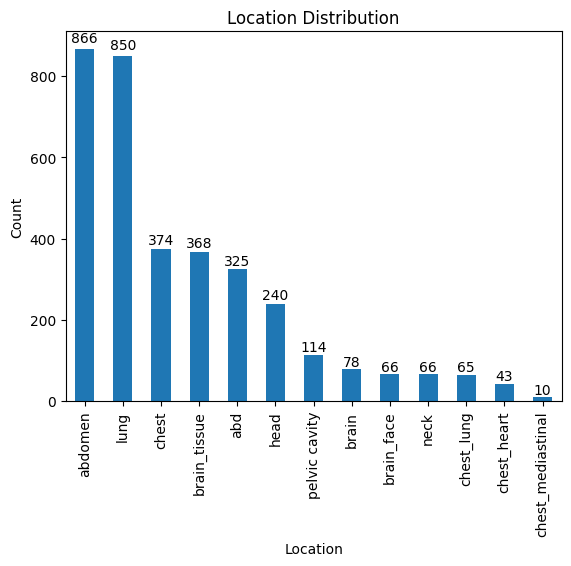

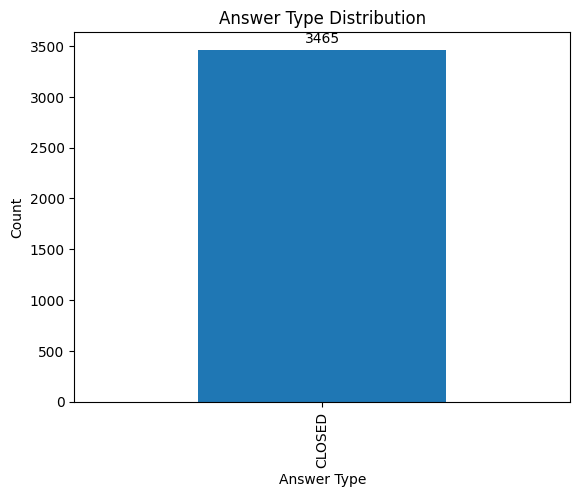

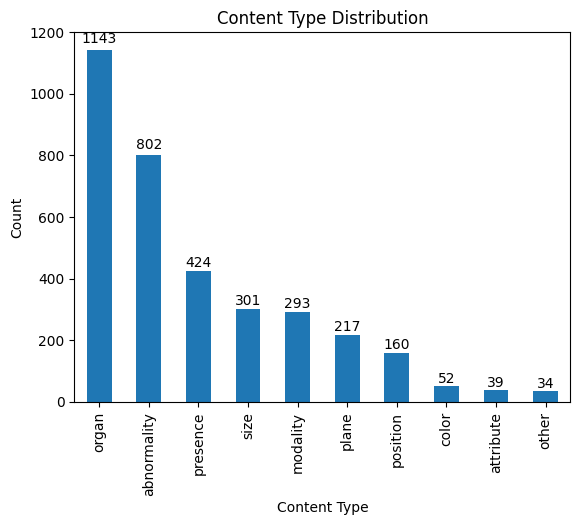

In [131]:
plot_distribution(
    merged_df,
    col="location",
    x_label="Location",
    y_label="Count",
    title="Location Distribution"
)

plot_distribution(
    merged_df,
    col="answer_type",
    x_label="Answer Type",
    y_label="Count",
    title="Answer Type Distribution"
)

plot_distribution(
    merged_df,
    col="content_type",
    x_label="Content Type",
    y_label="Count",
    title="Content Type Distribution"
)
